In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
def generate_synthetic_data(length=1000):
    np.random.seed(42)
    time = np.arange(length)
    series = np.sin(0.1 * time) + 0.2 * np.random.randn(length)
    return series

In [4]:
data_length = 1000
data = generate_synthetic_data(data_length)
dates = pd.date_range(start="2020-01-01", periods=data_length)
synthetic_data = pd.DataFrame(data, index=dates, columns=['Close'])

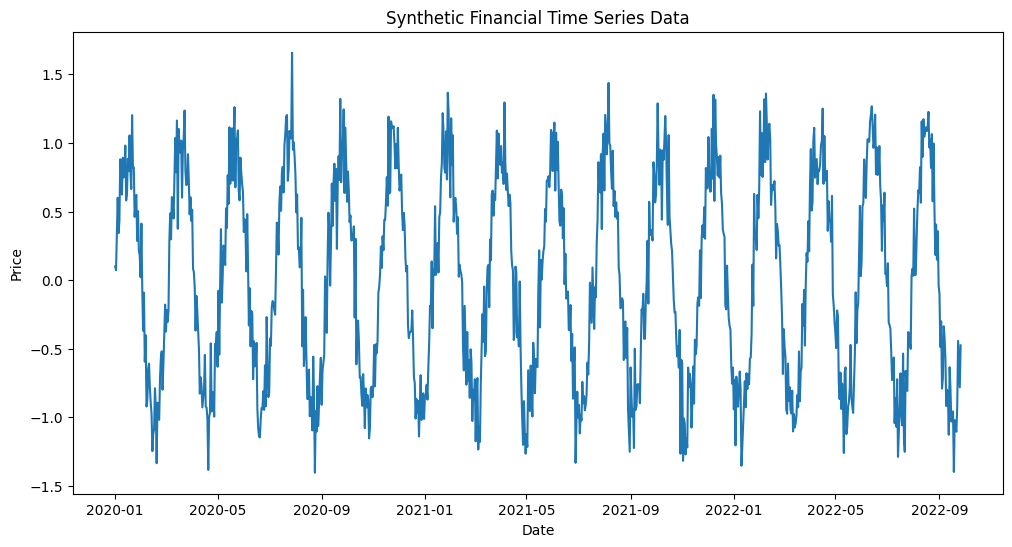

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(synthetic_data.index, synthetic_data['Close'])
plt.title("Synthetic Financial Time Series Data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [6]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(synthetic_data)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [7]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [8]:
seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [9]:
model = Sequential()
model.add(Dense(128, input_dim=seq_length, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))
model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")

/Users/jorocca/tf_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-17 17:26:04.876598: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-03-17 17:26:04.876756: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-03-17 17:26:04.876760: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-03-17 17:26:04.876978: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-17 17:26:04.876991: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created

In [10]:
# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


2025-03-17 17:26:58.917585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2855 - val_loss: 0.0221
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1492 - val_loss: 0.0096
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1195 - val_loss: 0.0246
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1348 - val_loss: 0.0121
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1502 - val_loss: 0.0086
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1103 - val_loss: 0.0096
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1246 - val_loss: 0.0098
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1580 - val_loss: 0.0177
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1219 - val_loss: 0.0194
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1227 - val_loss: 0.0091
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1052 - val_loss: 0.0099
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1256 - val_l

In [11]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [12]:
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))

In [13]:
mse = np.mean((predictions - y_test_rescaled)**2)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.05965809090420503


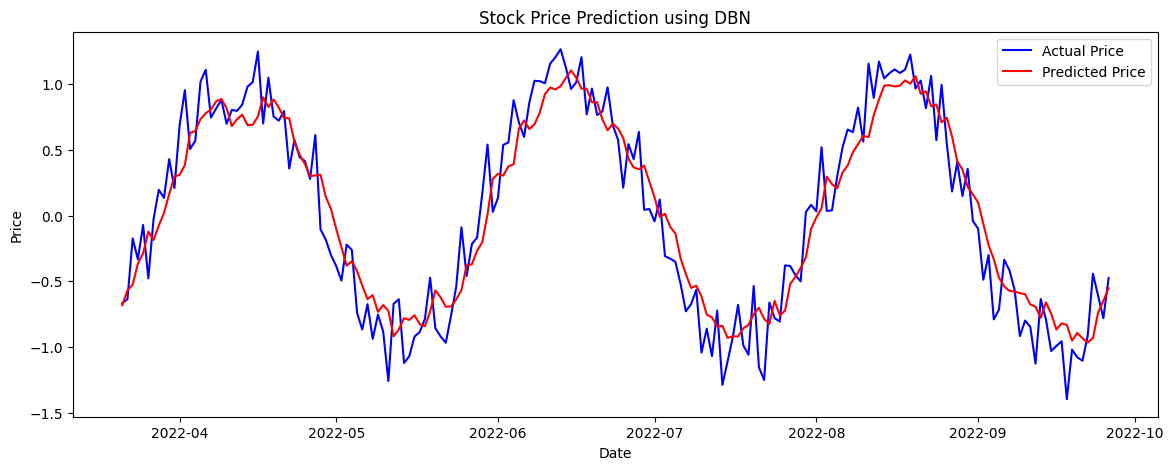

In [14]:
plt.figure(figsize=(14,5))
plt.plot(synthetic_data.index[train_size+seq_length:], y_test_rescaled, color="blue", label="Actual Price")
plt.plot(synthetic_data.index[train_size+seq_length:], predictions, color="red", label="Predicted Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price Prediction using DBN")
plt.legend()
plt.show()